<a href="https://colab.research.google.com/github/santhosh1417ai/CODSOFT-/blob/main/data_science_TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK-3 IRIS FLOWER CLASSIFICATION**

In [ ]:
#@title Import necessary libraries and load the Iris dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
iris = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project/IRIS.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#@title Frequency distribution of species
import pandas as pd
iris_outcome = pd.crosstab(index=iris['species'], columns='count')
iris_outcome


col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


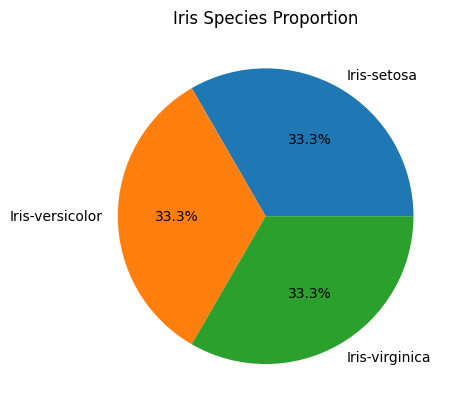

In [ ]:
# @title Iris Species Proportion
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
counts = [50, 50, 50]

plt.pie(counts, labels=species, autopct='%1.1f%%')
_ = plt.title('Iris Species Proportion')

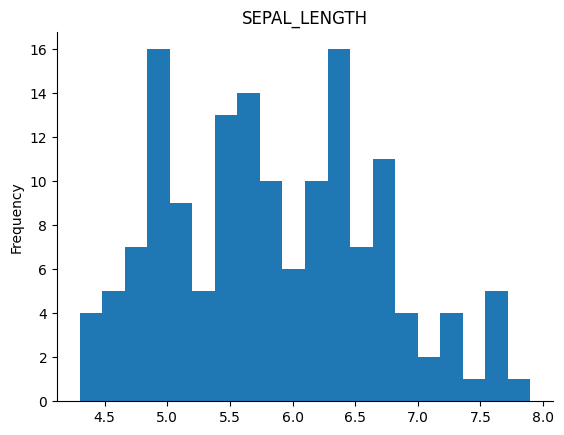

In [ ]:
#@title Distributions
iris['sepal_length'].plot(kind='hist', bins=20, title="SEPAL_LENGTH")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()


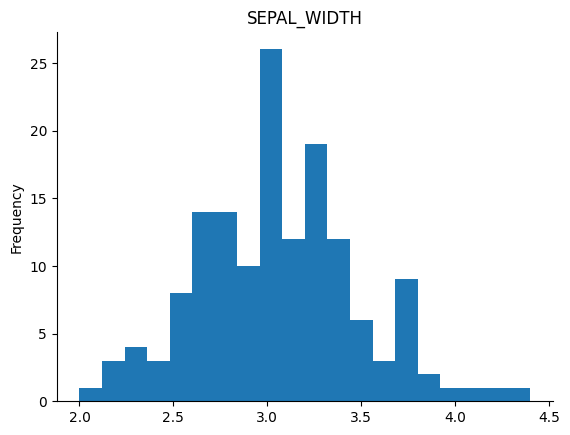

In [ ]:
iris['sepal_width'].plot(kind='hist', bins=20, title="SEPAL_WIDTH")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

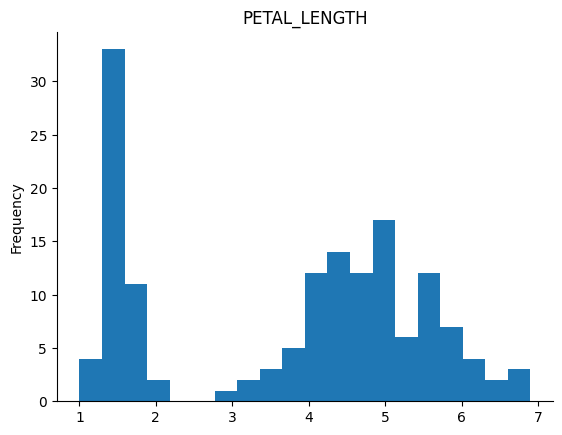

In [ ]:
iris['petal_length'].plot(kind='hist', bins=20, title="PETAL_LENGTH")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

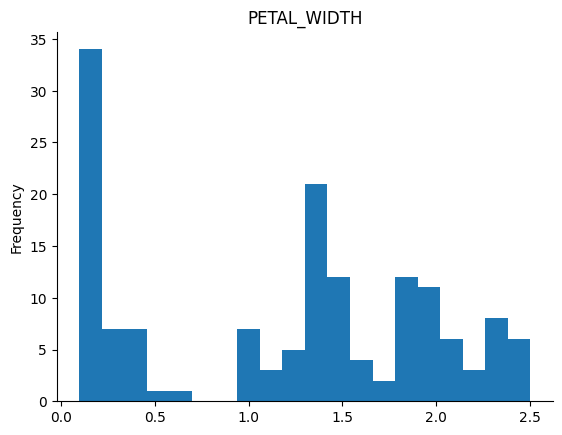

In [ ]:
iris['petal width (cm)'].plot(kind='hist', bins=20, title="PETAL_WIDTH")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

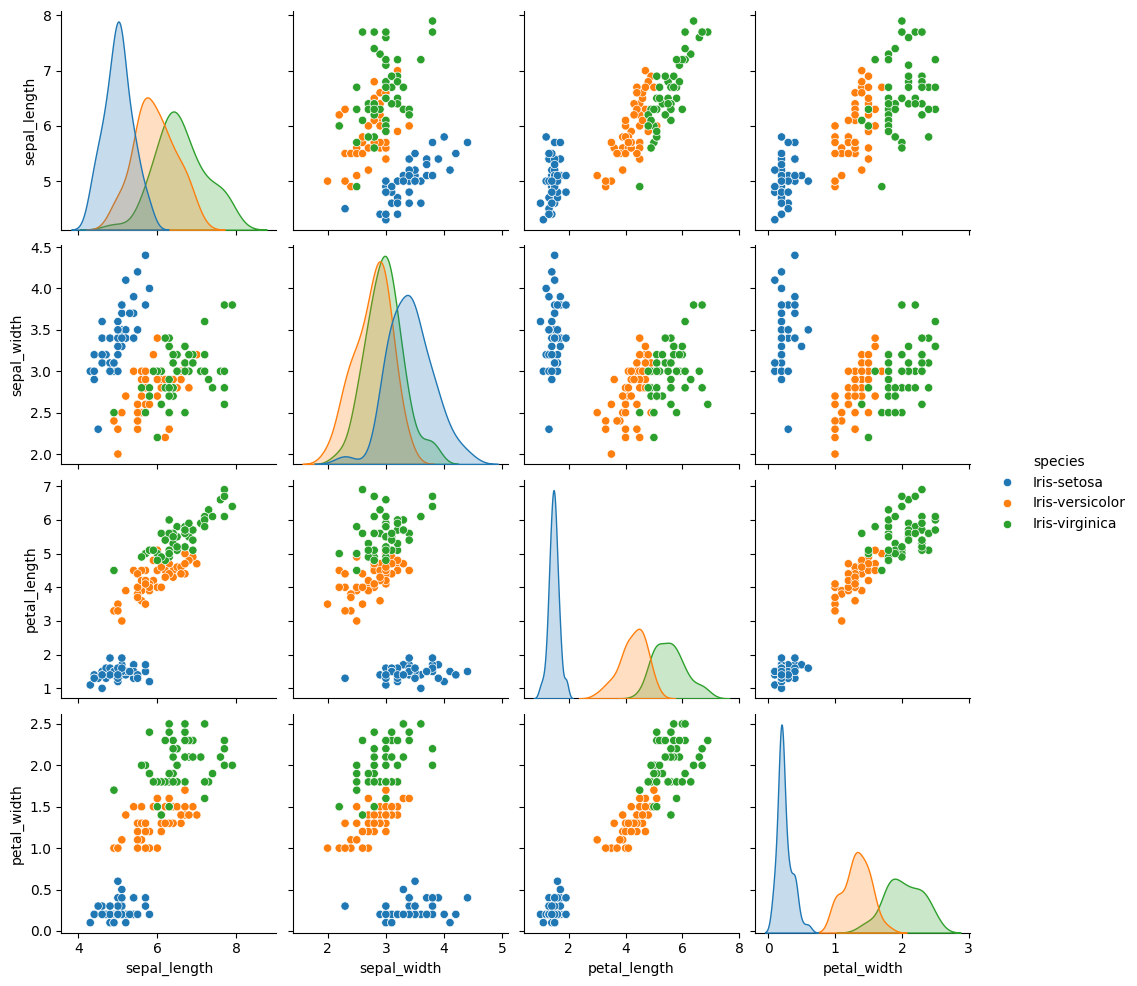

In [ ]:
#@title Pairplot of Iris dataset
import seaborn as sns
sns.pairplot(iris, hue='species', diag_kind='kde')
plt.show()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


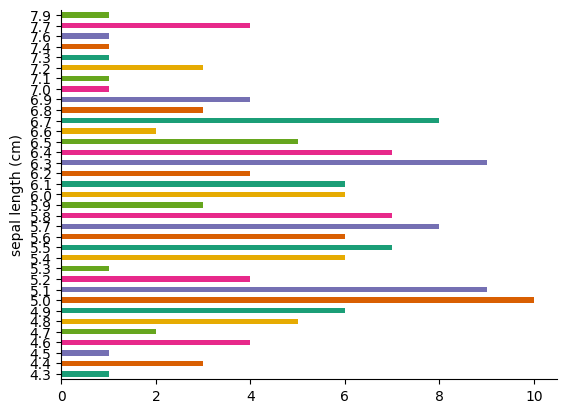

In [ ]:
#@title Categorical distributions
print(iris.columns)

iris.groupby('sepal length (cm)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

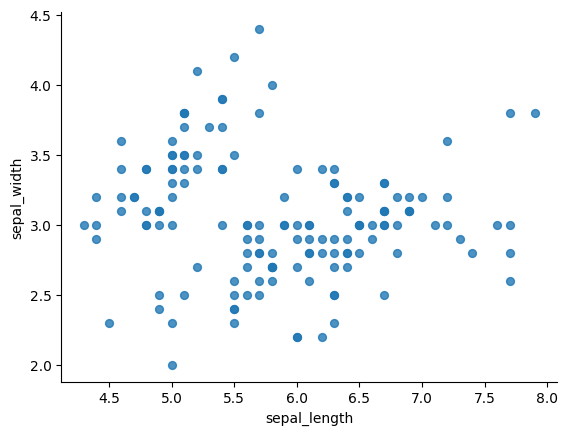

In [ ]:
#@title 2D-scatter plots
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

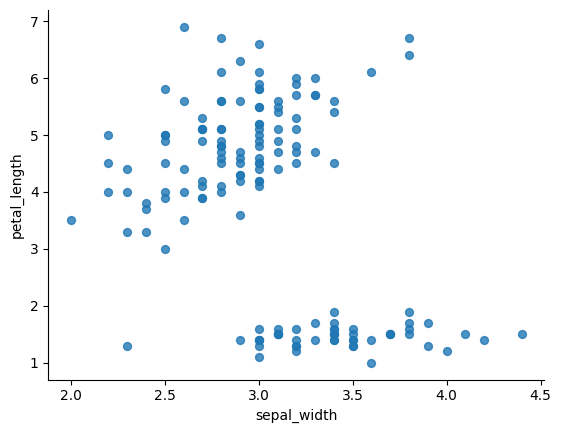

In [ ]:
iris.plot(kind='scatter', x='sepal_width', y='petal_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

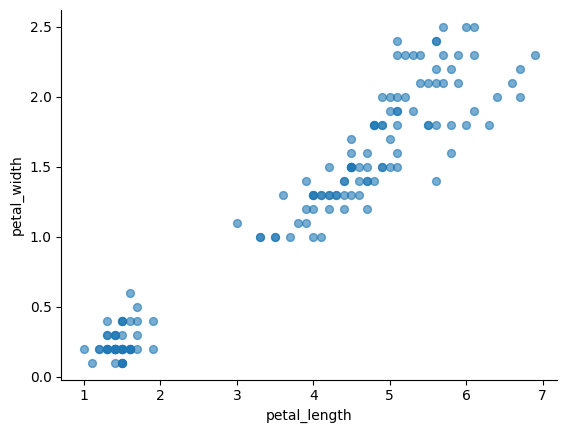

In [ ]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', s=32, alpha=.6)
plt.gca().spines[['top', 'right',]].set_visible(False)

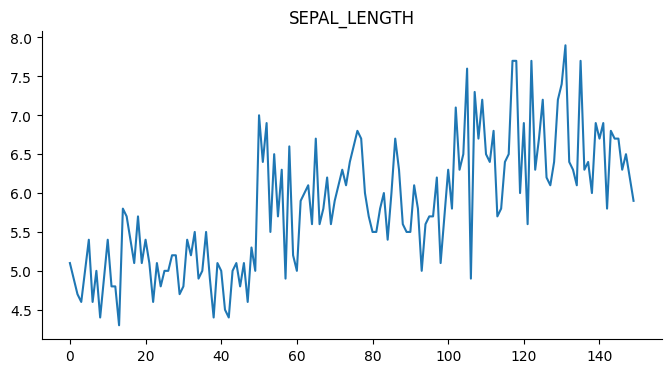

In [ ]:
#@title VALUES
iris['sepal_length'].plot(kind='line', figsize=(8, 4), title="SEPAL_LENGTH")
plt.gca().spines[['top', 'right']].set_visible(False)

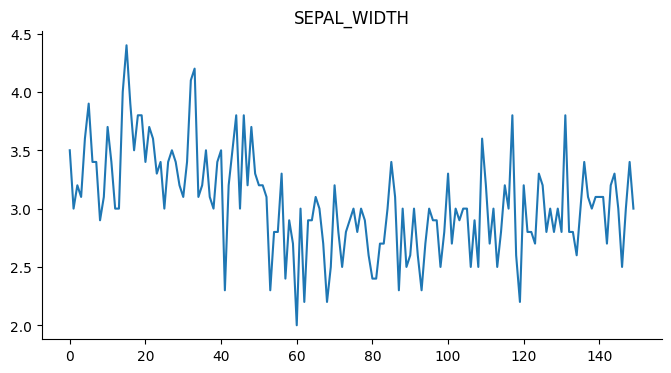

In [ ]:
iris['sepal_width'].plot(kind='line', figsize=(8, 4), title="SEPAL_WIDTH")
plt.gca().spines[['top', 'right']].set_visible(False)

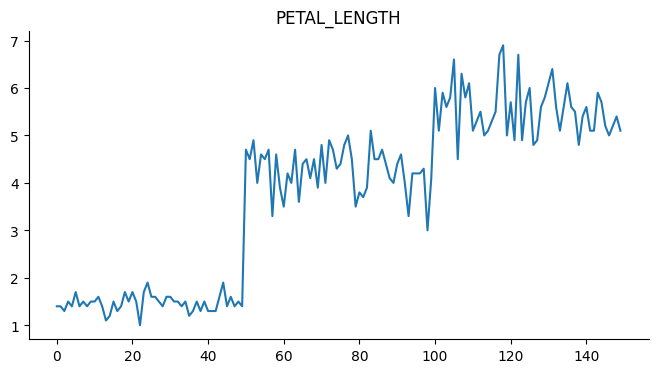

In [ ]:
iris['petal_length'].plot(kind='line', figsize=(8, 4), title="PETAL_LENGTH")
plt.gca().spines[['top', 'right']].set_visible(False)

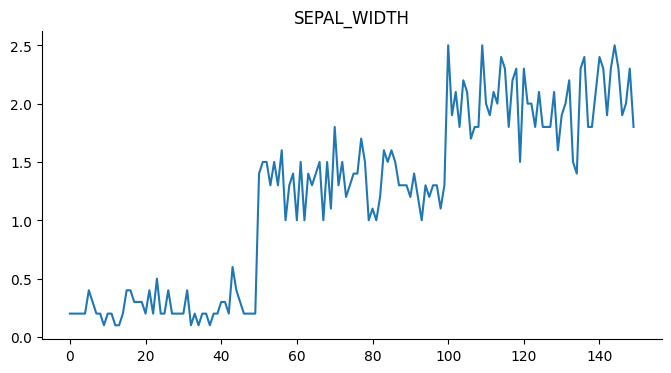

In [ ]:
iris['petal_width'].plot(kind='line', figsize=(8, 4), title="SEPAL_WIDTH")
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-62-ae6a87c80f12>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(iris, x='sepal_length', y='species', inner='stick', palette='Dark2')


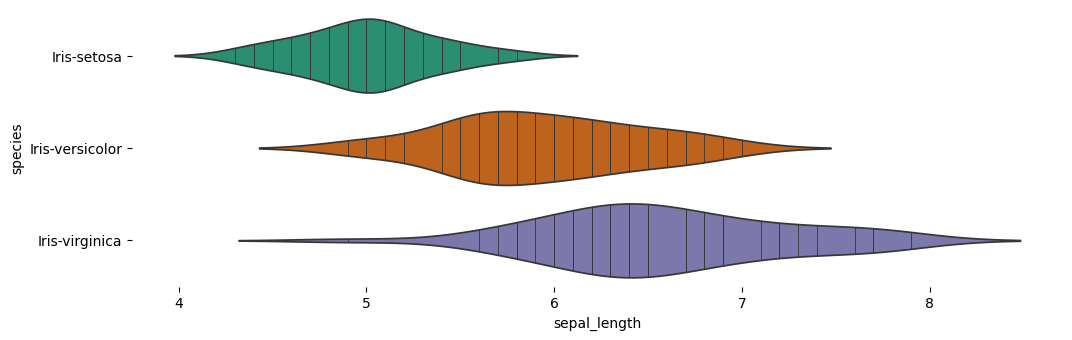

In [ ]:
#@title Faceted distributions
figsize = (12, 1.2 * len(iris['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(iris, x='sepal_length', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)


<ipython-input-64-07dac7c49439>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(iris, x='sepal_width', y='species', inner='stick', palette='Dark2')


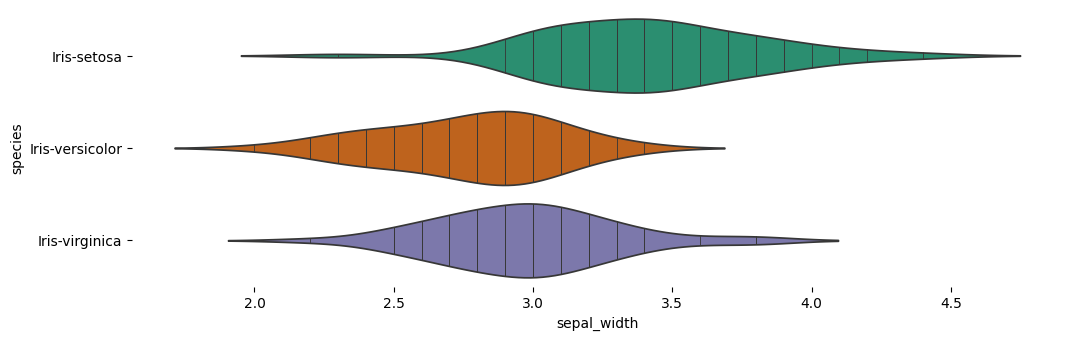

In [ ]:
figsize = (12, 1.2 * len(iris['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(iris, x='sepal_width', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-63-f8fbc89ad64e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(iris, x='petal_length', y='species', inner='stick', palette='Dark2')


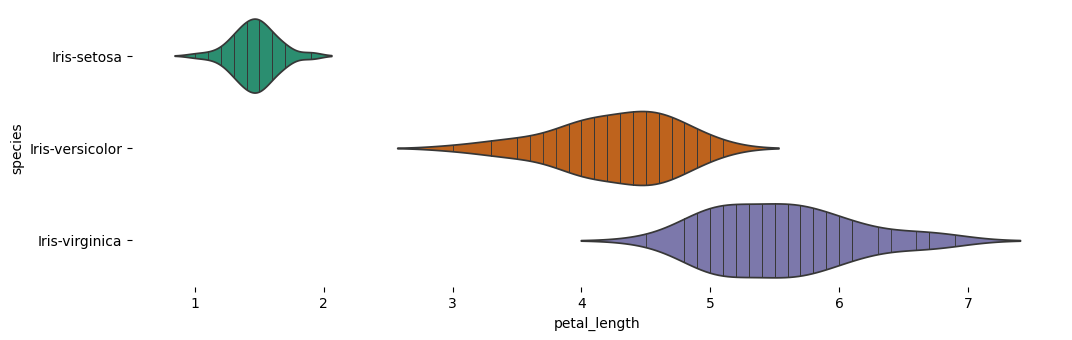

In [ ]:
figsize = (12, 1.2 * len(iris['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(iris, x='petal_length', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-65-82606973fcf3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(iris, x='petal_width', y='species', inner='stick', palette='Dark2')


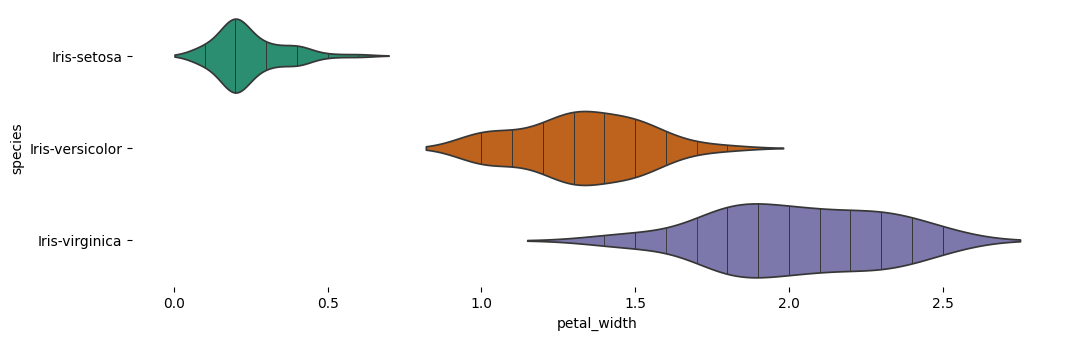

In [ ]:
figsize = (12, 1.2 * len(iris['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(iris, x='petal_width', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

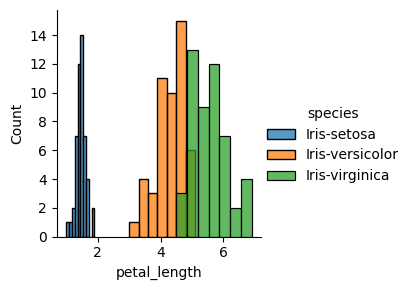

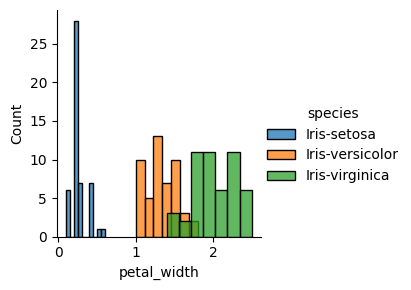

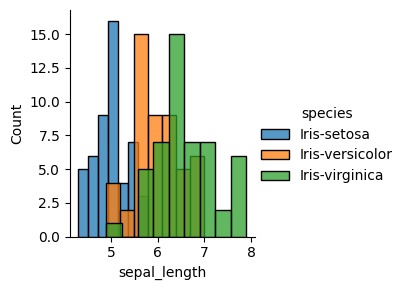

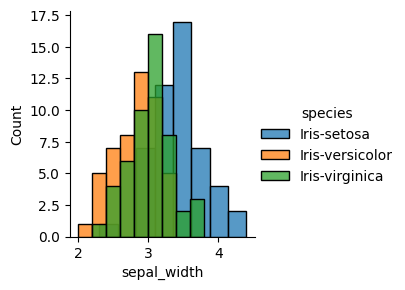

In [ ]:
iris_setosa = iris.loc[iris["species"] == "Iris-setosa"]
iris_virginica = iris.loc[iris["species"] == "Iris-virginica"]
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"]

sns.FacetGrid(iris, hue="species", height=3).map(sns.histplot, "petal_length").add_legend()
sns.FacetGrid(iris, hue="species", height=3).map(sns.histplot, "petal_width").add_legend()
sns.FacetGrid(iris, hue="species", height=3).map(sns.histplot, "sepal_length").add_legend()
sns.FacetGrid(iris, hue="species", height=3).map(sns.histplot, "sepal_width").add_legend()
plt.show()

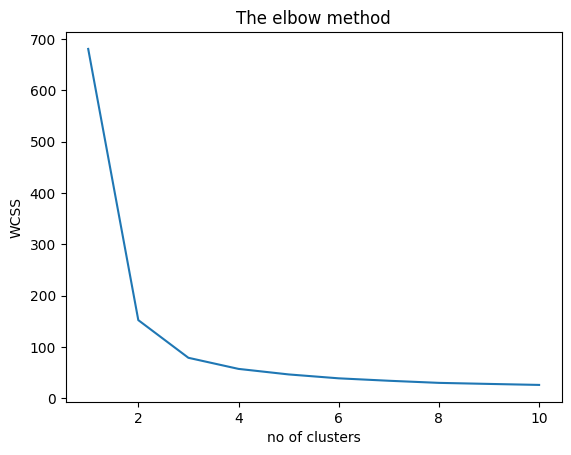

In [ ]:
#@title K-means
x = iris.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('no of clusters')
plt.ylabel('WCSS')
plt.show()

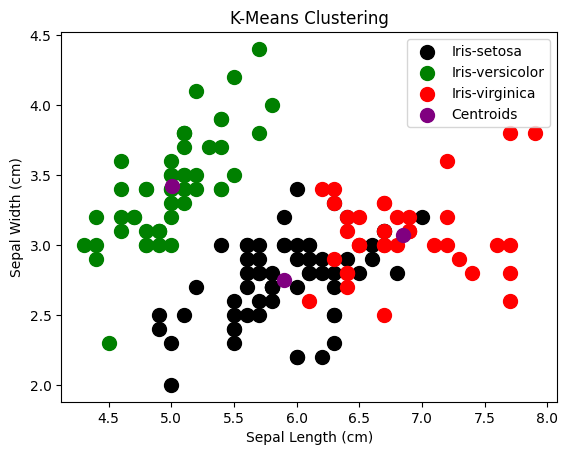

In [ ]:
#@title Implementing K-Means Clustering
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'purple', label = 'Centroids')

plt.legend()
plt.title('K-Means Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

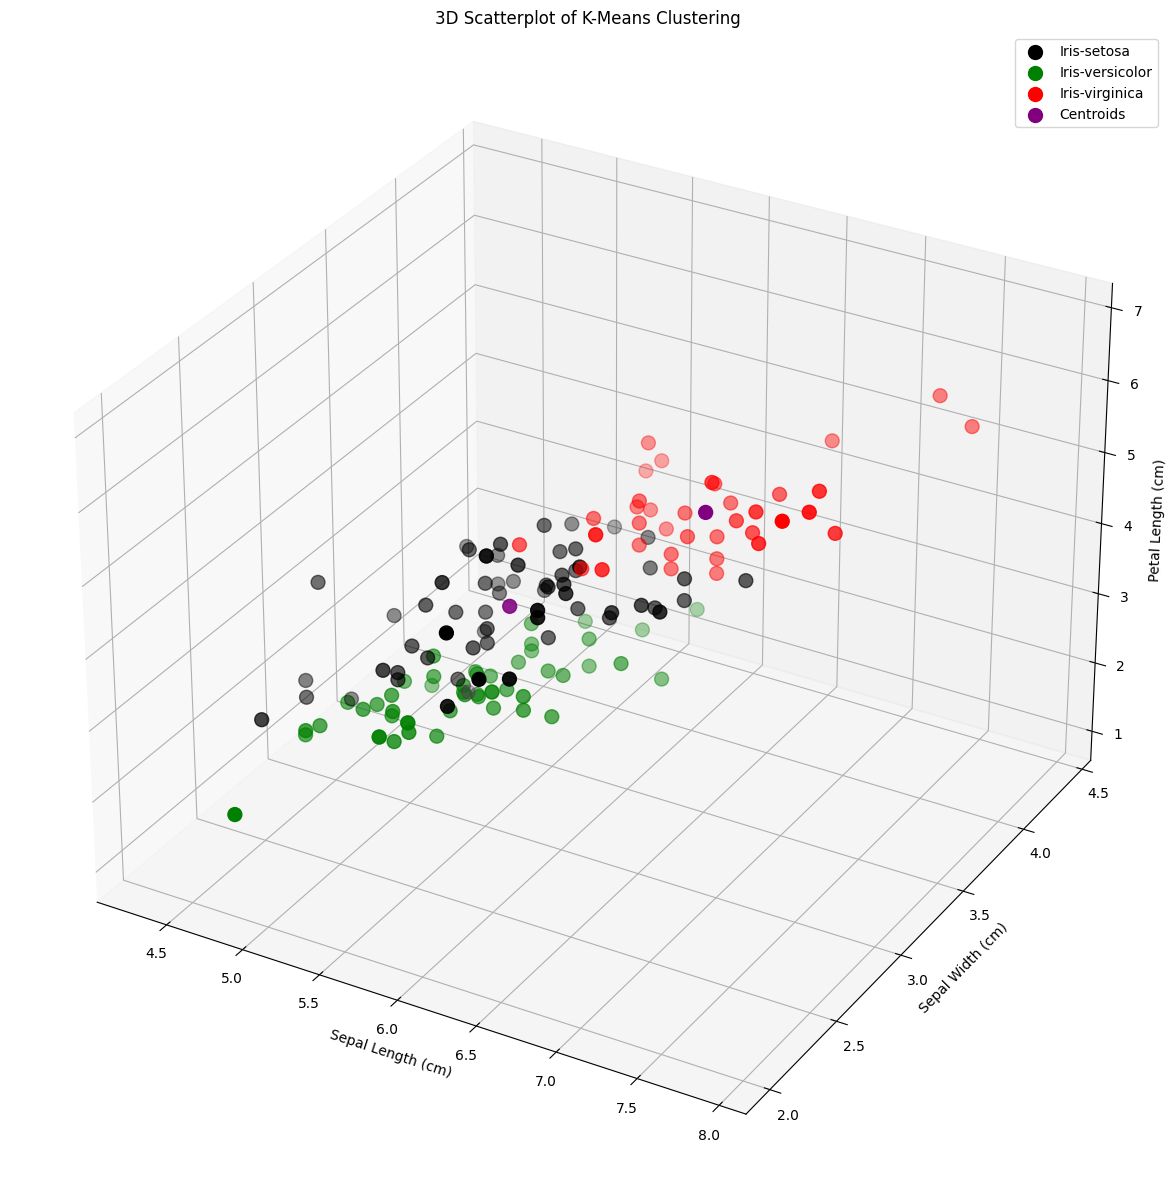

In [ ]:
#@title 3D scatterplot
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the iris dataset (assuming it's available)
from sklearn import datasets
iris = datasets.load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Prepare the data for clustering
x = iris.iloc[:, [0, 1, 2, 3]].values

# Perform K-means clustering (assuming you want 3 clusters)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Create the 3D scatterplot
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s = 100, c = 'black', label = 'Iris-setosa')
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], s = 100, c = 'green', label = 'Iris-versicolor')
ax.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 100, c = 'purple', label = 'Centroids')

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Scatterplot of K-Means Clustering')
ax.legend()
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#@title k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("k-NN Accuracy:", accuracy_knn)

k-NN Accuracy: 1.0


In [ ]:
#@title Support Vector Machine (SVM)
svm = SVC(kernel='linear')  # You can experiment with different kernels
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 1.0


In [ ]:
#@title Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 1.0


In [ ]:
#@title Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#@title Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define parameters for grid search
params = {'n_neighbors': [3, 5, 7, 9]}

# Perform grid search
grid_search = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")


Best Parameters: {'n_neighbors': 3}
Best Accuracy: 0.9583333333333334
